In [138]:
import pandas as pd
import scipy.stats as sts
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1=pd.read_csv("C:\\Users\\mahav\\clonedRepositories\\Datasets\\phone_data.csv")

In [139]:
import warnings
warnings.filterwarnings('ignore')

2.Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, and messages of various network. Data Cleaning and basic EDA process needs to be performed.
a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset. c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

e) Perform statistical tests to identify the relation between network and network_type.

Note:

1) Perform all the Statistical analysis with 5% (Significance level).

2) Perform the test of normality and test of variance in the appropriate places.

df1 = pd.read_csv('phone.csv')

In [116]:
df1

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [117]:
df1.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [118]:
df1.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [119]:
df1['date'] = df1['date'].astype('datetime64')


In [120]:
x = pd.DatetimeIndex(df1['date']).month

In [121]:
df1['month'] = x
x

Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             8,  9, 10, 11, 12,  3,  3,  3,  3,  3],
           dtype='int64', name='date', length=830)

In [122]:
df1.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                    int64
network                 object
network_type            object
dtype: object

In [123]:
df1.isnull().sum() #no null data

index           0
date            0
duration        0
item            0
month           0
network         0
network_type    0
dtype: int64

a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results.

In [124]:
m = df1.duration.mean()
s = df1.duration.std()
n = len(df1)
sts.norm.interval(0.95, loc = m, scale = s/np.sqrt(n))

(87.58930566721992, 148.01876662193675)

In [125]:
sts.norm.interval(0.95, loc = m, scale = s/np.sqrt(n))

(87.58930566721992, 148.01876662193675)

In [126]:
sts.norm.interval(0.99, loc = m, scale = s/np.sqrt(n))

(78.09514925874313, 157.51292303041353)

it can be interpreted that the example 2 confident interval is wider than the example 1 confident interval with the 95% of the population, which means that there are 99% chances the confidence interval of [78 ,157 ] contains the true population mean

b) Perform statistical analysis to check whether the networks are equally distributed in the dataset. 

In [127]:
df1.network.unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline', 'special', 'world'], dtype=object)

In [128]:
df2=df1.network.value_counts()
df2

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
world          7
special        3
Name: network, dtype: int64

In [129]:
len(df1)//7

118

In [130]:
# H0 : networks are equally distributed in the dataset.
# H1 : networks are not equally distributed in the dataset.

observed=[215,215,150,87,84,42,27]
expected=[117,117,117,117,117,117,118]

sts.chisquare(f_obs = observed, f_exp = expected)

Power_divergenceResult(statistic=308.73352165725055, pvalue=1.099187551267738e-63)

c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph.

In [131]:
df1.network.value_counts()

Three        215
Vodafone     215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
world          7
special        3
Name: network, dtype: int64

In [132]:
df1.columns

Index(['index', 'date', 'duration', 'item', 'month', 'network',
       'network_type'],
      dtype='object')

In [133]:
d1=df1[df1['network']=='Vodafone']['duration']
d2=df1[df1['network']=='Three']['duration']
d3=df1[df1['network']=='data']['duration']
d4=df1[df1['network']=='Meteor']['duration']
d5=df1[df1['network']=='Tesco']['duration']
d6=df1[df1['network']=='landline']['duration']
d7=df1[df1['network']=='Voicemail']['duration']


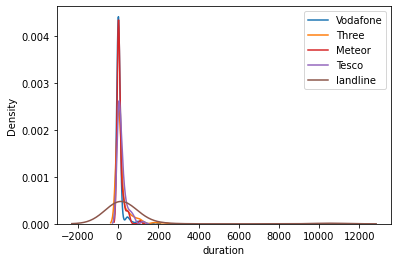

In [134]:
sns.kdeplot(d1, label = 'Vodafone')
sns.kdeplot(d2, label = 'Three')
sns.kdeplot(d3, label = 'data')
sns.kdeplot(d4, label = 'Meteor')
sns.kdeplot(d5, label = 'Tesco')
sns.kdeplot(d6, label = 'landline')
sns.kdeplot(d7, label = 'Voicemail')
plt.legend()
plt.show()

d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [135]:
# H0 : there is  relation between item and duration.
# H1 : there is no relation between item and duration.

df1.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [146]:
d1=df1[df1['item']=='data']['duration']
d2=df1[df1['item']=='call']['duration']
d3=df1[df1['item']=='sms']['duration']

In [152]:
f_oneway(d1,d2,d3)

F_onewayResult(statistic=28.738991192189417, pvalue=8.579121317902198e-13)

p values less than  aplha, so reject  H0 So we can concludecthere is  relation between item and duration.



In [154]:
from scipy.stats import chi2_contingency
 

e) Perform statistical tests to identify the relation between network and network_type.
H0: network and network_type are independent.
H1 : network and network_type are not independent.

In [155]:
c=pd.crosstab(df1['network'],df1['network_type'])
chi2_contingency(c)

(4150.0,
 0.0,
 40,
 array([[1.57228916e+01, 4.40240964e+00, 6.29963855e+01, 3.14457831e-01,
         2.83012048e+00, 7.33734940e-01],
        [1.51807229e+01, 4.25060241e+00, 6.08240964e+01, 3.03614458e-01,
         2.73253012e+00, 7.08433735e-01],
        [3.88554217e+01, 1.08795181e+01, 1.55680723e+02, 7.77108434e-01,
         6.99397590e+00, 1.81325301e+00],
        [3.88554217e+01, 1.08795181e+01, 1.55680723e+02, 7.77108434e-01,
         6.99397590e+00, 1.81325301e+00],
        [2.71084337e+01, 7.59036145e+00, 1.08614458e+02, 5.42168675e-01,
         4.87951807e+00, 1.26506024e+00],
        [7.59036145e+00, 2.12530120e+00, 3.04120482e+01, 1.51807229e-01,
         1.36626506e+00, 3.54216867e-01],
        [5.42168675e-01, 1.51807229e-01, 2.17228916e+00, 1.08433735e-02,
         9.75903614e-02, 2.53012048e-02],
        [4.87951807e+00, 1.36626506e+00, 1.95506024e+01, 9.75903614e-02,
         8.78313253e-01, 2.27710843e-01],
        [1.26506024e+00, 3.54216867e-01, 5.06867470e+00, 2.5